In [1]:
# !pip install shapely
# !pip install scikit-learn==1.5.0


In [2]:
import json
import itertools
import pandas as pd
from lib import *
from scipy.stats import gaussian_kde
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

model_path = '../modeling/2d/'
data_path = './data/formatted/reflimr_liver.csv'
data_path = './data/formatted/hoffmann_hcv.csv'
ris_path = './data/leeds_ris.json'
gender = 'M'
log_analytes = [ # analytes that will be log scaled
    'alanine aminotransferase',
    'aspartate aminotransferase',
    'bilirubin',
    'gamma-glutamyl transferase'
]


# create analyzer
analyzer = ReferenceRegionAnalyzer(model_path, ris_path)


In [3]:
# load dataset
df = pd.read_csv(data_path, index_col=0)
analytes = df.columns[3:] # list of analytes


In [4]:
print('No. data points: '+str(df.shape[0]))


No. data points: 612


In [5]:
analyte_dict = { # analyte abbreviations
    'alanine aminotransferase': 'ALT',
    'albumin': 'ALB',
    'alkaline phosphatase': 'ALK',
    'aspartate aminotransferase': 'AST',
    'globulin': 'GLOB',
    'platelets': 'PLT',
    'bilirubin': 'BIL',
    'creatinine': 'CREA',
    'gamma-glutamyl transferase': 'GGT', 
    'total protein': 'PROT'
}


In [6]:
labelpad = -1
labelfs = 12
subplotspacing = 0.4


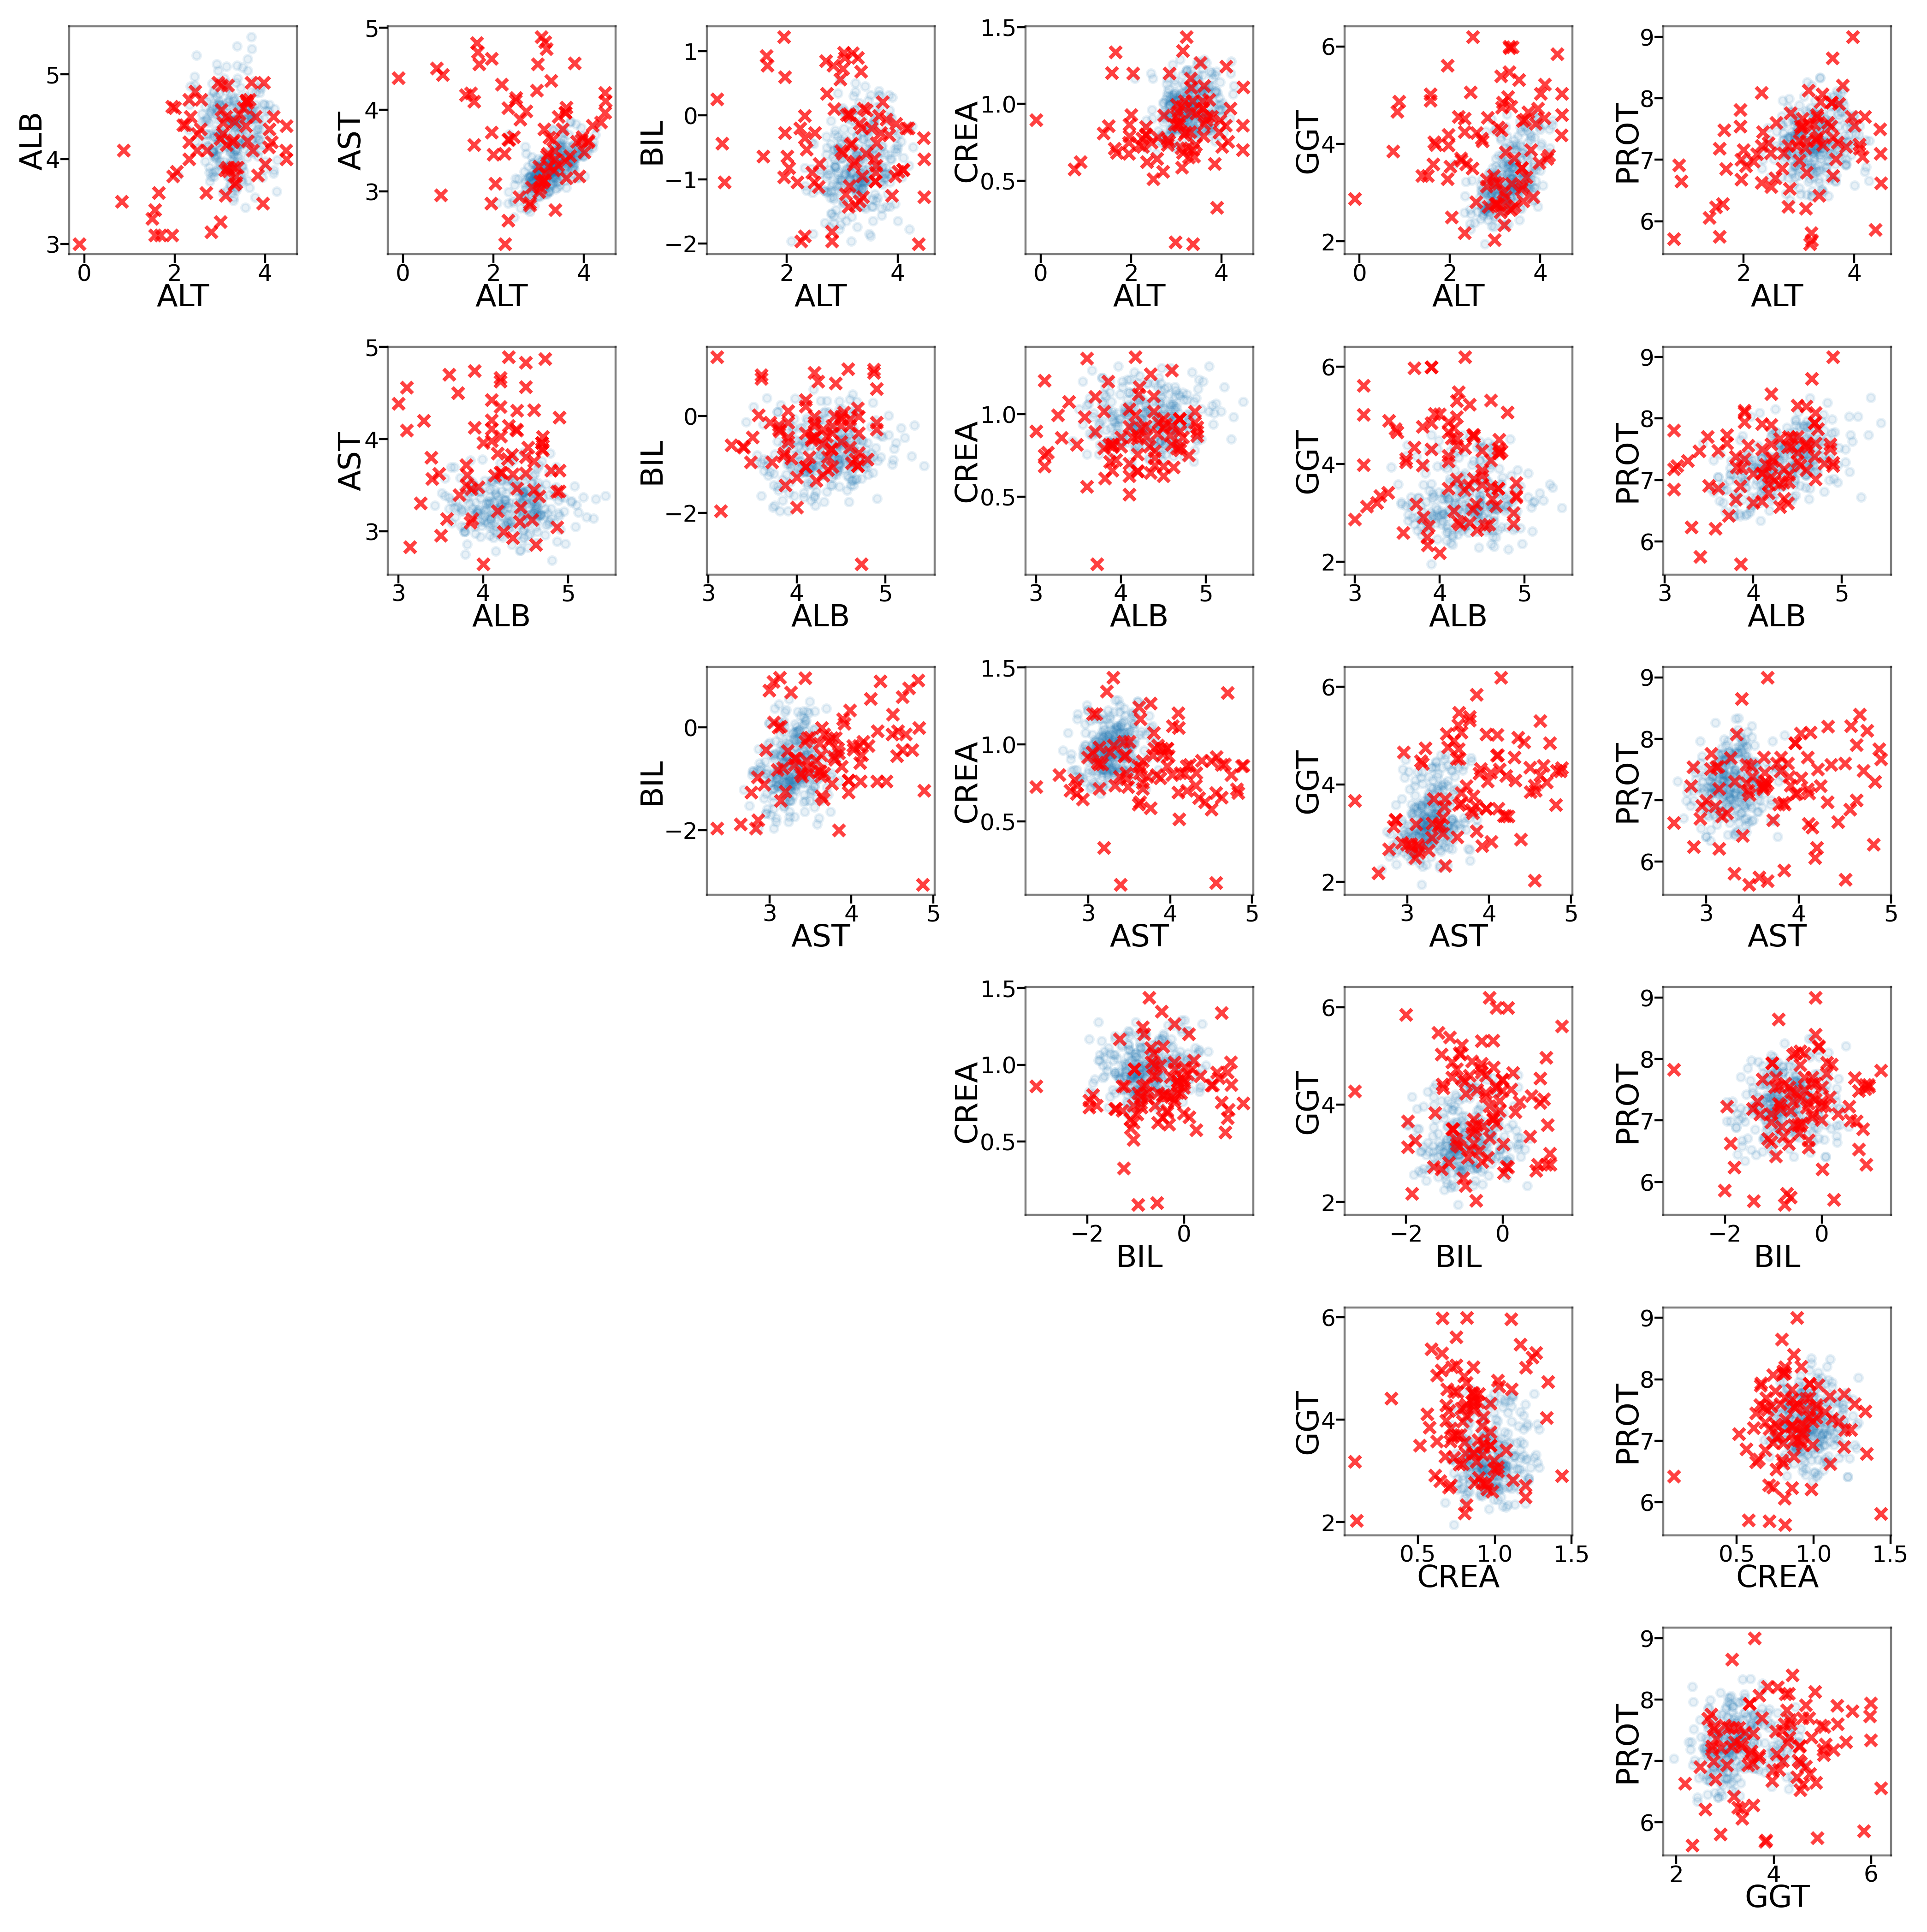

In [7]:
plt.figure(figsize=(12, 12), dpi=400)

ncols = len(analytes)
n = 0
for i in range(ncols):
    for j in range(ncols):
                
        n+=1
        
        if j<i:
            continue
        if j==i:
            continue
            
        ans = [analytes[i], analytes[j]]
        
        # get full dataset not transformed
        data, labels, ages = get_data(df, ans, gender, log_analytes,
                                      outlier_removal = True,
                                      transform = True)
        
        plt.subplot(ncols, ncols, n)

        # scatter
        plt.scatter(data[~labels,0], data[~labels,1], s=10, alpha=0.1)
        plt.scatter(data[labels,0], data[labels,1], s=20, alpha=0.75, marker='x', color='red')
                
        # formatting
        plt.gca().set_box_aspect(1)
        plt.gca().tick_params(axis='both', labelsize=9, pad=0)
        plt.xlabel(analyte_dict[ans[0]], labelpad=labelpad, fontsize=labelfs)
        plt.ylabel(analyte_dict[ans[1]], labelpad=labelpad, fontsize=labelfs)
        for spine in plt.gca().spines.values():
            spine.set_alpha(0.5)
            
plt.tight_layout()
plt.subplots_adjust(wspace=subplotspacing, hspace=subplotspacing)

    